## Attribute Information:

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided on the UC Irvine’s Machine Learning Repository.
The data set shows each session that belong to a different user in a 1-year period.

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The **"Bounce Rate"**, **"Exit Rate"** and **"Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.onth of the year.

### Column Descriptions  <br>

**Administrative**: This is the number of pages of this type (administrative) that the user visited.

**Administrative_Duration** : This is the amount of time spent in this category of pages.

**Informational**           : This is the number of pages of this type (informational) that the user visited.

**Informational_Duration**  : This is the amount of time spent in this category of pages.

**ProductRelated**          : This is the number of pages of this type (product related) that the user visited.

**ProductRelated_Duration** : This is the amount of time spent in this category of pages.

**BounceRates**             : The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

**ExitRates**               : The percentage of pageviews on the website that end at that specific page.

**PageValues**              : The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
<br>[More information about how this value is calculated](https://support.google.com/analytics/answer/2695658?hl=en)

**SpecialDay**              : This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day)                             in  which the transaction is more likely to be finalized. 

**Month**                  : Contains the month the pageview occurred, in string form.

**OperatingSystems**       : An integer value representing the operating system that the user was on when viewing the page.

**Browser**                : An integer value representing the browser that the user was using to view the page.

**Region**                 : An integer value representing which region the user is located in.

**TrafficType**            : An integer value representing what type of traffic the user is categorized into.
<br>[Read more about traffic types here.](https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics)

**VisitorType**            : A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

**Weekend**                : A boolean representing whether the session is on a weekend.<br>
**Revenue**                : A boolean representing whether or not the user completed the purchase.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import random
import plotly.express as px

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from collections import Counter


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/nabee/Desktop/CIND 820/Shoppers Data Set.csv')

Text(0.5, 1.0, 'Number of Successful Transactions close to a Special Day')

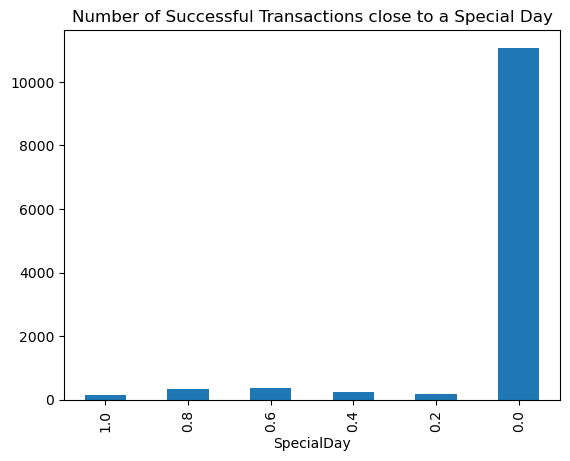

In [3]:
df.SpecialDay.value_counts().sort_index(ascending=False).plot(kind='bar')
plt.title("Number of Successful Transactions close to a Special Day")

##### Imputing or Handling Missing Values

In [4]:
dfnullcheck = df.isna().sum()
# print (df[(df[cols] == 'something1').all(1)])
print("There are no NULL values in the dataset")
dfnullcheck 

There are no NULL values in the dataset


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

##### Checking for duplicate records

In [5]:
# **********************************lookinf for duplicate values ******************************************
df['UniqueID'] = df.astype(str).values.sum(axis=1)
uid = df["UniqueID"]
print("Total duplicate records in dataset :",df.shape)

# df = df.drop_duplicates('UniqueID', keep='last')
print("""There are a few duplicate records in the data set but we are not removing them because they are not real duplicates,it belongs to different 
customers but due to the nature of the data that we have a few duplicates.""")
del df['UniqueID']

Total duplicate records in dataset : (12330, 19)
There are a few duplicate records in the data set but we are not removing them because they are not real duplicates,it belongs to different 
customers but due to the nature of the data that we have a few duplicates.


In [6]:
# **************************************Converting the data types as required ***************************************
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [8]:
df.describe(include=['object','bool'])

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


The data is imbalances with only where only 15% of the sessions ended in a purchase , we will need to explore some balancing techniques


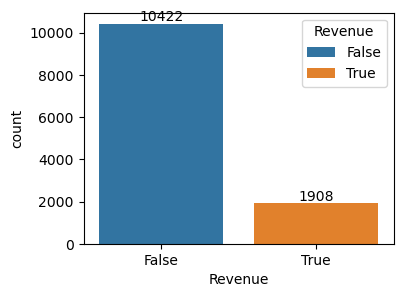

In [9]:
plt.figure(figsize=(4,3))
ax = sns.countplot(df, x= "Revenue", hue="Revenue" ,
                order=df['Revenue'].value_counts(ascending=False).index)
for i in ax.containers:
     ax.bar_label(i,)
print("The data is imbalances with only where only 15% of the sessions ended in a purchase , we will need to explore some balancing techniques")

In [10]:
for i in df.select_dtypes(include='object').columns:
    print(i)
    print(df[i].unique())
    print()

Month
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

OperatingSystems
[1 2 4 3 7 6 8 5]

Browser
[1 2 3 4 5 6 7 10 8 9 12 13 11]

Region
[1 9 2 3 4 5 6 7 8]

TrafficType
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 18 19 16 17 20]

VisitorType
['Returning_Visitor' 'New_Visitor' 'Other']



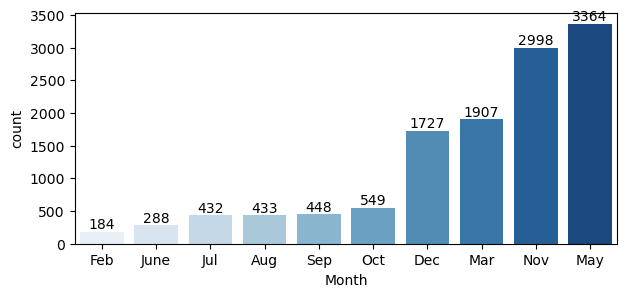

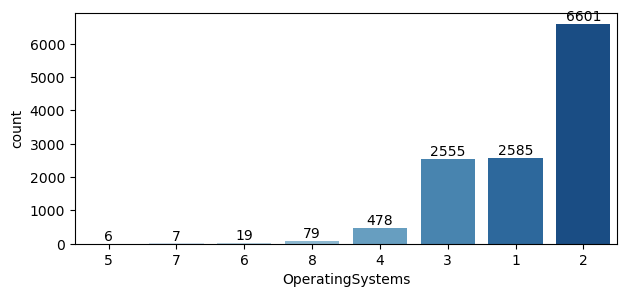

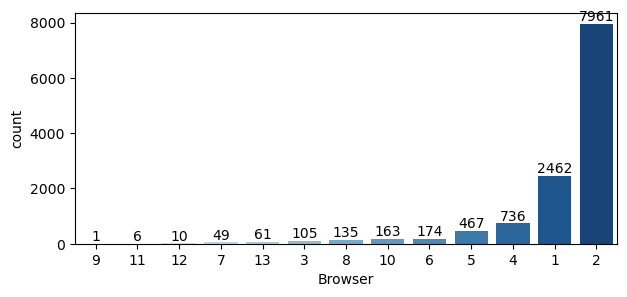

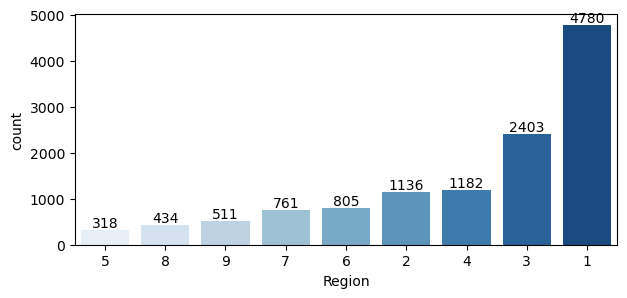

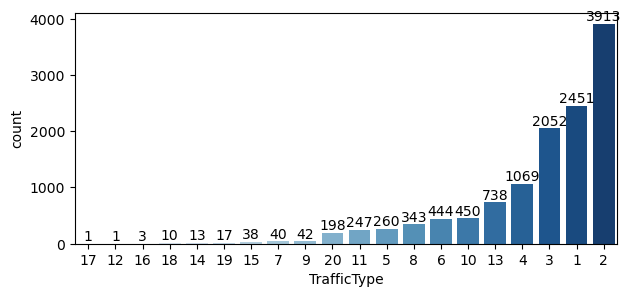

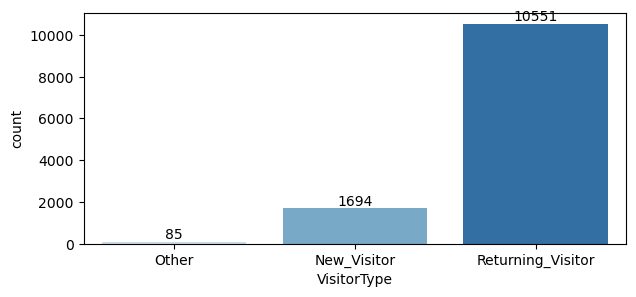

In [12]:
for i in df.select_dtypes(include=['object']).columns:
    s = df[i].value_counts(ascending = True)   
    plt.figure(figsize=(7,3))
    ax = sns.countplot(df, x= i, order = s.index , palette = 'Blues')
    for i in ax.containers:
        ax.bar_label(i,)

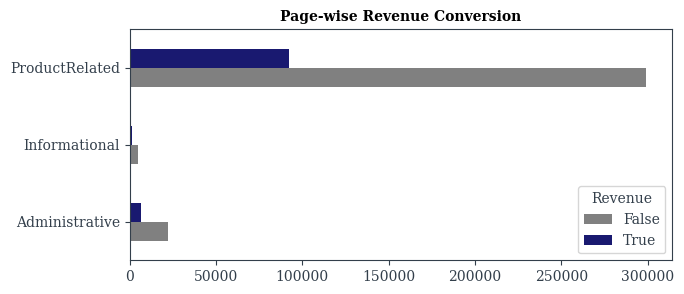

The majority of the sessions on the website included visit to product related pages.
    Further, it has the highest contribution to revenue generation. 
    Therefore, product related pages are of utmost importance to the client as suggested by the number of customer visits.


In [13]:
page = pd.pivot_table(df,values=['Administrative','Informational','ProductRelated'],index='Revenue',aggfunc='sum')

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

page.T.plot(kind='barh',figsize=(7,3),color=['grey', 'midnightblue'])
plt.title('Page-wise Revenue Conversion',fontweight='bold',size=10,color='black')
# plt.ylabel('Type of Page')
# plt.xlabel('Sum of Visits')
plt.show()
print ("""The majority of the sessions on the website included visit to product related pages.
    Further, it has the highest contribution to revenue generation. 
    Therefore, product related pages are of utmost importance to the client as suggested by the number of customer visits.""")

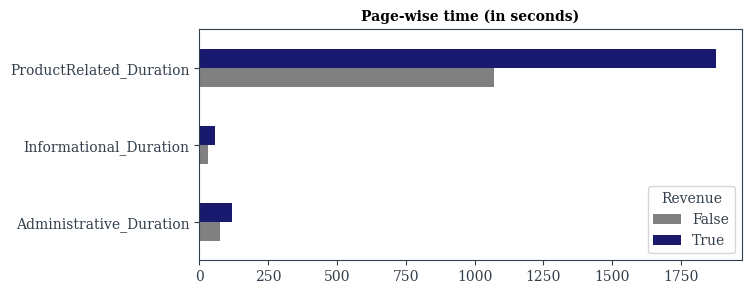

The majority of the time spent on the website was on Product Related pages.
Therefore, product related pages are of utmost importance to the client from the perspective of revenue generation.


In [14]:
pd.pivot_table(df,values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],index='Revenue').T.plot(kind='barh',figsize=(7,3),color=['grey', 'midnightblue'])
plt.title('Page-wise time (in seconds)',fontweight='bold',size=10,color='black')
# plt.ylabel('Type of Page')
# plt.xlabel('Duration of Visit')
plt.show()
print ( """The majority of the time spent on the website was on Product Related pages.
Therefore, product related pages are of utmost importance to the client from the perspective of revenue generation.""")

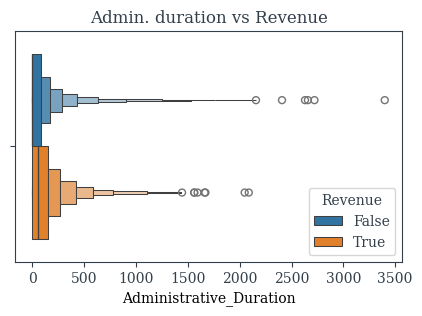

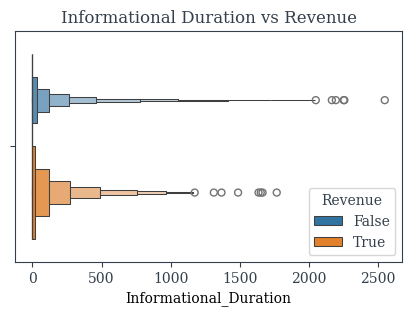

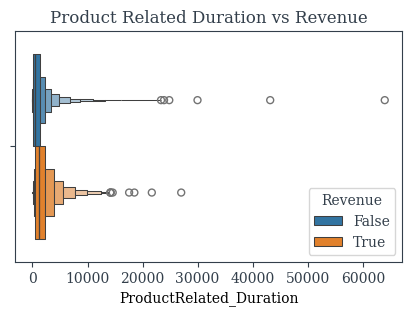

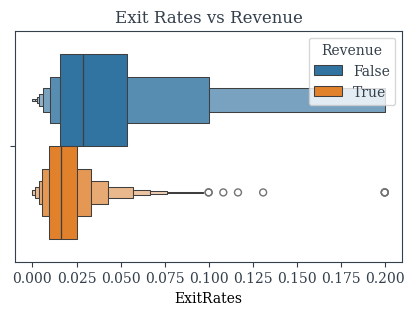

In [17]:
plt.rcParams['figure.figsize'] = (5, 3)

sns.boxenplot(df, x = "Administrative_Duration", hue = "Revenue")
plt.title('Admin. duration vs Revenue', fontsize = 12)
# plt.xlabel('Admin. duration', fontsize = 8)
# plt.ylabel('Revenue', fontsize = 8)
plt.show()

sns.boxenplot(df, x = "Informational_Duration", hue = "Revenue")
plt.title('Informational Duration vs Revenue', fontsize = 12)
plt.show()


sns.boxenplot(df, x = "ProductRelated_Duration", hue = "Revenue")
plt.title('Product Related Duration vs Revenue', fontsize = 12)
plt.show()


sns.boxenplot(df, x = "ExitRates", hue = "Revenue")
plt.title('Exit Rates vs Revenue', fontsize = 12)
plt.show()

We see that Admin Duration, Product Related Duration are exponentially distributed and have outliers for both TRUE and FALSE.

Exit Rate is normally distributed but has outliers for records where purchase made was True.

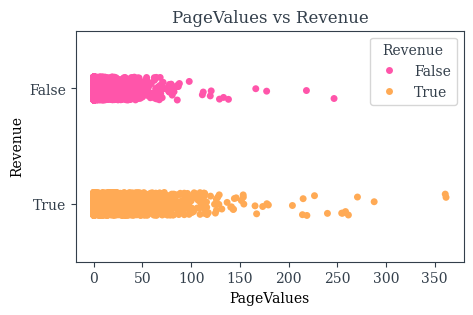

Page Values is also exponentially distributed and has outliers , but is also influential on the Revenue Column and is a significant feature


In [18]:
plt.rcParams['figure.figsize'] = (5, 3)
sns.stripplot(df, x = "PageValues", y = "Revenue", hue = "Revenue", palette = 'spring', orient = 'h')
plt.title('PageValues vs Revenue', fontsize = 12)
plt.show()
print("Page Values is also exponentially distributed and has outliers , but is also influential on the Revenue Column and is a significant feature")

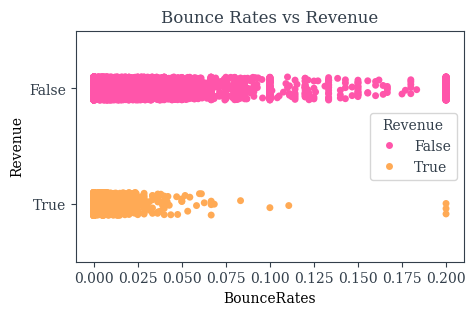

In [20]:
plt.rcParams['figure.figsize'] = (5, 3)
sns.stripplot(df, x = "BounceRates", y = "Revenue", hue = "Revenue", palette = 'spring', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 12)
plt.show()

In [21]:
# identify outliers with standard deviation
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in numerical_columns:
    data_mean, data_std = mean(df[i]), std(df[i])
    
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # print(i, ': \n')

    # identify outliers
    outliers = [x for x in df[i] if x < lower or x > upper]
    num_out = len(outliers)
    # print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in df[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    # print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    # print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

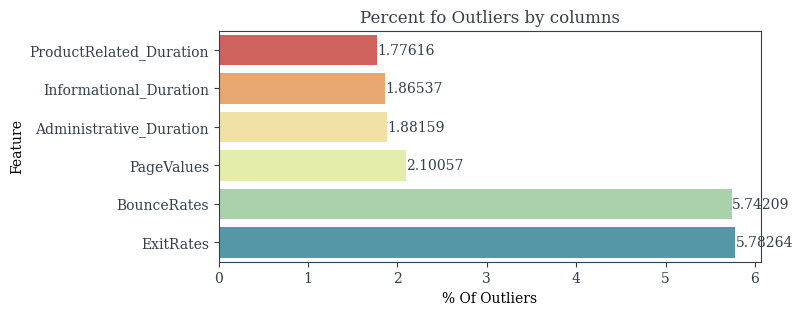

In [22]:
# GnBu_d
sns.color_palette("Spectral", as_cmap=True)
Outliers = pd.DataFrame({'Feature': numerical_columns, '% Of Outliers': out_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = True)
plt.rcParams['figure.figsize'] = (7, 3)
ax = sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'],palette = 'Spectral') 
plt.title('Percent fo Outliers by columns')
for i in ax.containers:
     ax.bar_label(i,)
plt.show()

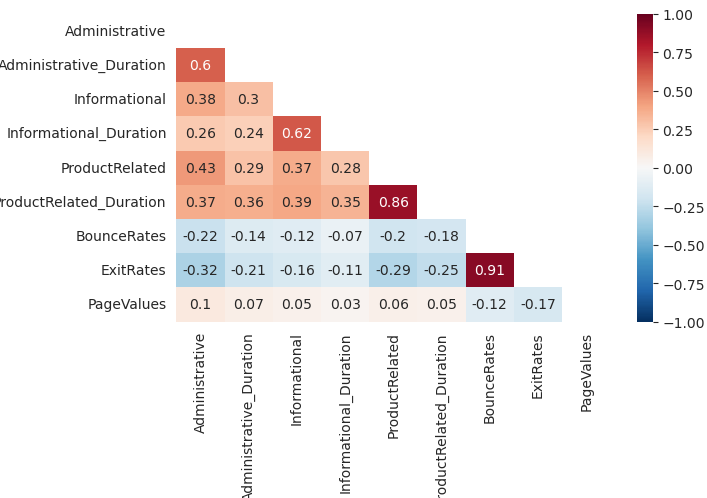

In [23]:
# Check for correlation
corr = df.iloc[: , :9].corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(7,4))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");
    fig.savefig('heatmap.png')

# Analysis on only Revenue Positive Cases (15.5% of Data)

In [15]:
rev_yes_month = df[df['Revenue']== True]['Month'].value_counts()
label = rev_yes_month.index
values = rev_yes_month.values

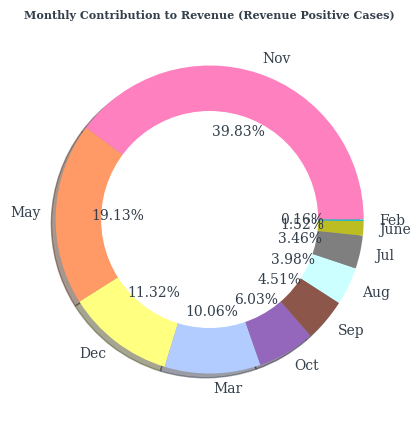

In [16]:
plt.figure(figsize=(5,5))
my_circle= plt.Circle( (0,0), 0.7, color='white')
plt.pie(rev_yes_month,labels=label,shadow=True,colors=['#ff80bf','#ff9966', '#ffff80', '#b3ccff', '#9467bd', '#8c564b', '#ccffff', '#7f7f7f', '#bcbd22', '#17becf'],autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Monthly Contribution to Revenue (Revenue Positive Cases)',fontweight= 'bold',size=8)
plt.show()

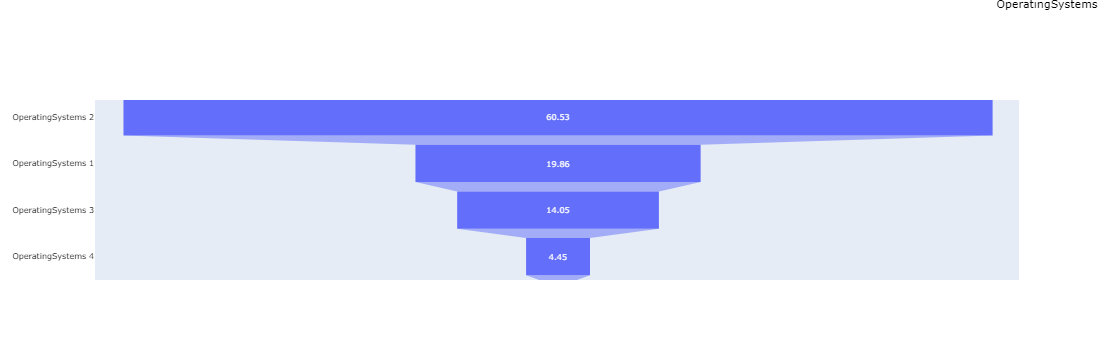

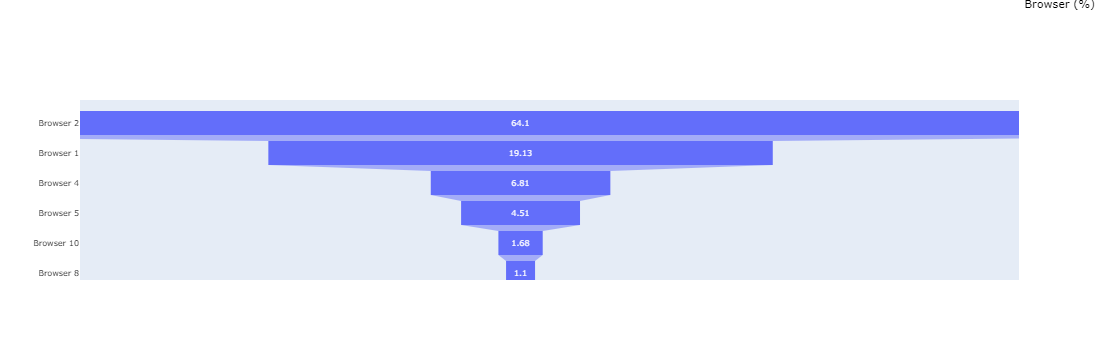

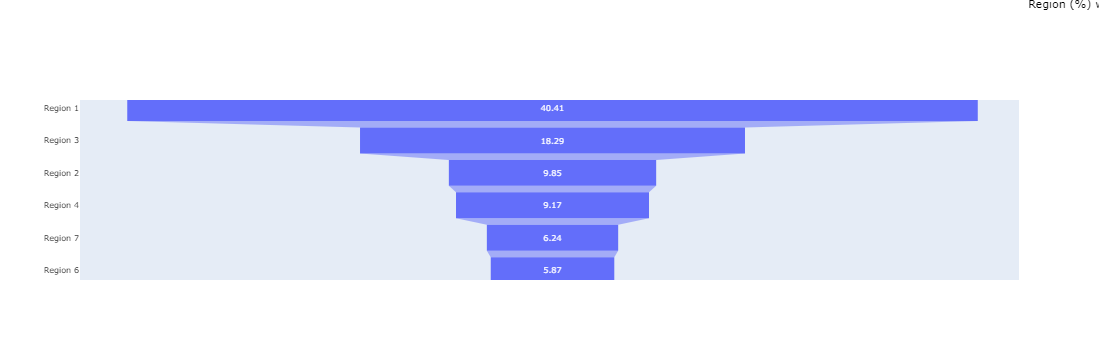

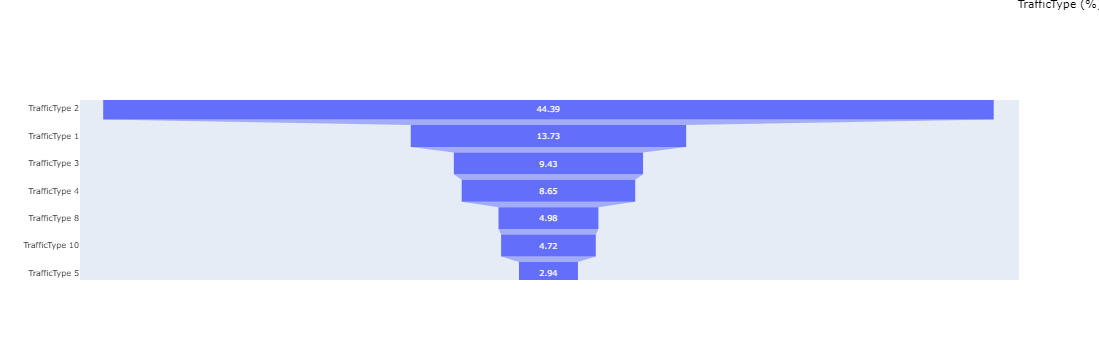

In [33]:
for j in ['OperatingSystems','Browser','Region','TrafficType']:    
    reg = round(df[df['Revenue'] ==True][j].value_counts(normalize=True)*100,2)
    
    ind = []
    for i in reg.index:
        i = str(i)
        v = j+' '+i
        ind.append(v)
        v =''

    from plotly import graph_objects as go
    fig = go.Figure(
       go.Funnel(
          y = ind,
          x = reg.values
       )
    )

    fig.update_layout(font_color="black",font=dict(size=8),title={
            'text': "{} (%) with Revenue".format(j),
            'y':1,
            'x':0.9,
            'xanchor': 'center',
            'yanchor': 'top'})
    fig.show()

# Understanding user charactersitics with Clustering Analysis

**Understanding user characteristics in terms of time spent on the Website**
1. Administrative Duration vs Bounce Rate
2. Information Duration vs Bounce Rate
3. Administrative Duration vs Exit Rates


**Understanding where the users come from**

1. Region vs Traffic Type
2. Administrative Duration vs Region


**The Elbow method to find out the maximum number of clusters**

1. Compute cus Region

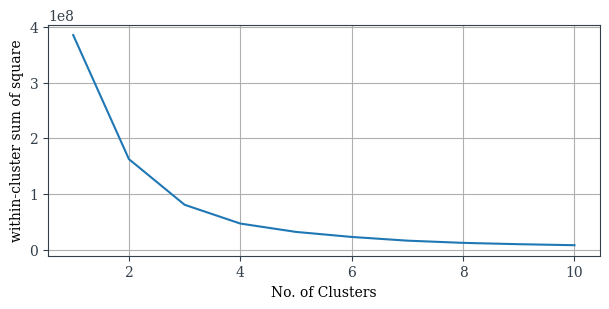

In [22]:
# Time spent by the Users on website vs Bounce Rates
# let's cluster Administrative duration and bounce Rates to different types of clusters in the dataset.
# preparing the dataset
adbr = df.iloc[:, [1, 6]].values


# checking the shape of the dataset
# print("Shape of the dataset: ", x.shape)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(adbr)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (6, 3)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

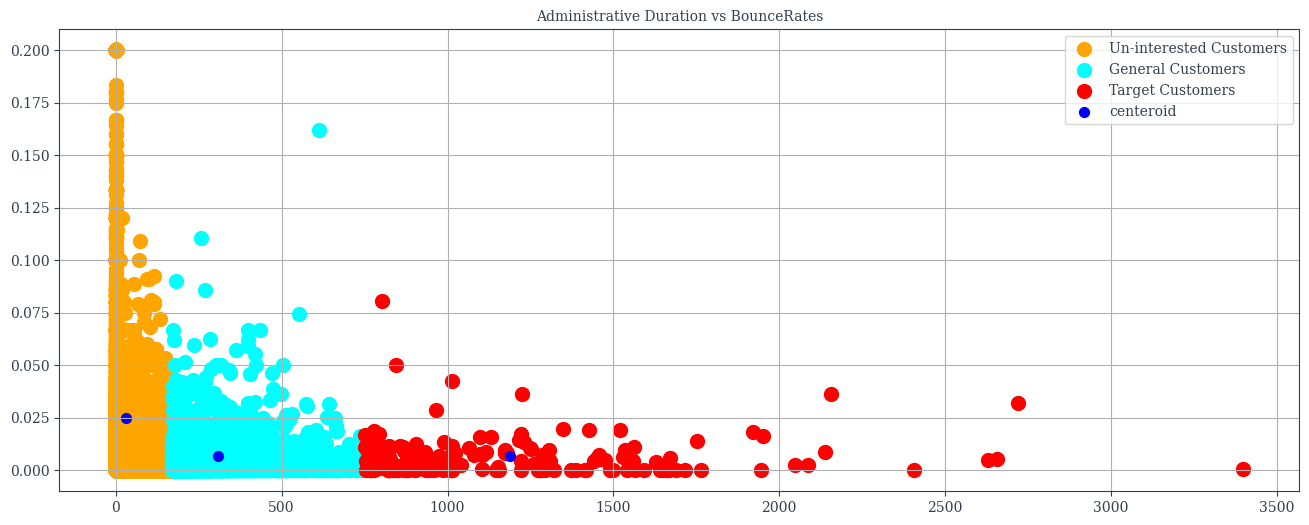

In [27]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(adbr)

plt.scatter(adbr[y_means == 0, 0], adbr[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(adbr[y_means == 2, 0], adbr[y_means == 2, 1], s = 100, c = 'cyan', label = 'General Customers')
plt.scatter(adbr[y_means == 1, 0], adbr[y_means == 1, 1], s = 100, c = 'red', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.rcParams['figure.figsize'] = (16, 6)
plt.title('Administrative Duration vs BounceRates', fontsize = 10)
plt.grid()
# plt.xlabel('Administrative Duration')
# plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

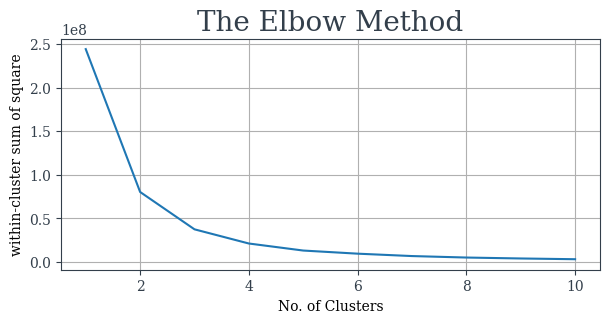

In [28]:
# cluster anaysis of Informational Duration vs Bounce Rates
idbr = df.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(idbr)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (6, 3)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

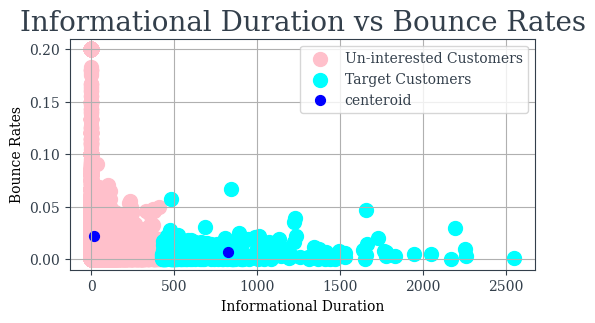

In [29]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(idbr)

plt.scatter(idbr[y_means == 0, 0], idbr[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(idbr[y_means == 1, 0], idbr[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.rcParams['figure.figsize'] = (30, 6)
plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

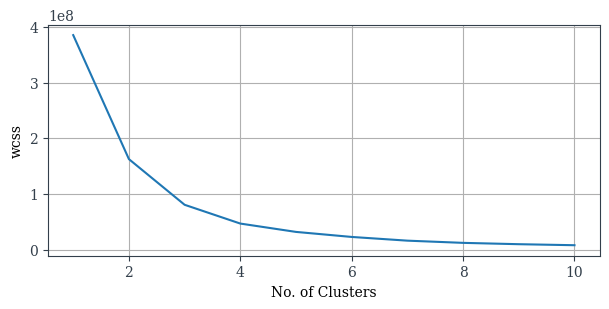

In [30]:
ader = df.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(ader)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (6,3)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

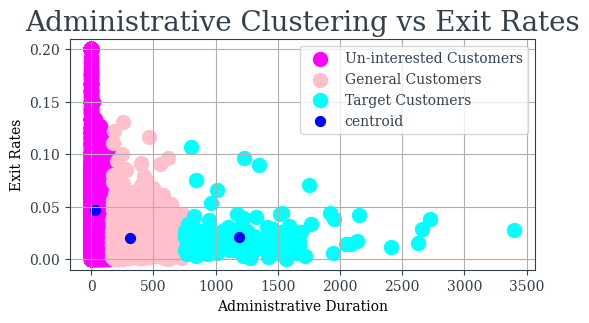

In [32]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(ader)

plt.scatter(ader[y_means == 0, 0], ader[y_means == 0, 1], s = 100, c = 'magenta', label = 'Un-interested Customers')
plt.scatter(ader[y_means == 2, 0], ader[y_means == 2, 1], s = 100, c = 'pink', label = 'General Customers')
plt.scatter(ader[y_means == 1, 0], ader[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()